In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
# cuda確認
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("cuda")
else:
    device = torch.device("cpu")
    print("cpu")

cuda


In [3]:
torch.device("cuda" if torch.cuda.is_available() else "cpu")

device(type='cuda')

In [4]:
!nvidia-smi

Sun Sep 17 17:40:31 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.67                 Driver Version: 536.67       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX 4000 SFF Ada ...  WDDM  | 00000000:01:00.0  On |                  Off |
| 44%   72C    P2              67W /  70W |  12704MiB / 20475MiB |     98%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
summary_df = pd.read_csv("../inputs/summaries_train.csv")
prompt_df = pd.read_csv("../inputs/prompts_train.csv")

In [7]:
summary_df

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757
...,...,...,...,...,...
7160,ff7c7e70df07,ebad26,They used all sorts of chemical concoctions to...,0.205683,0.380538
7161,ffc34d056498,3b9047,The lowest classes are slaves and farmers slav...,-0.308448,0.048171
7162,ffd1576d2e1b,3b9047,they sorta made people start workin...,-1.408180,-0.493603
7163,ffe4a98093b2,39c16e,An ideal tragety has three elements that make ...,-0.393310,0.627128


In [8]:
prompt_df

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


<Axes: >

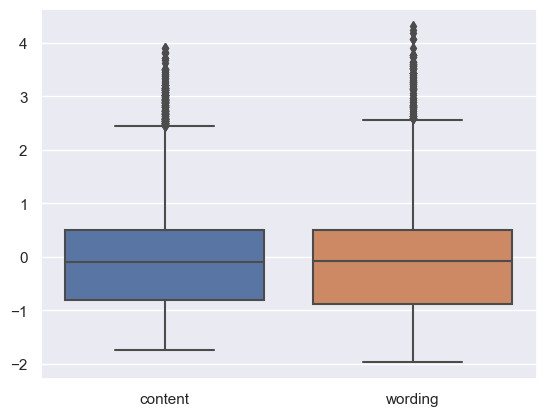

In [9]:
# 目的変数の状態
sns.boxplot(summary_df[["content", "wording"]])

<Axes: xlabel='content', ylabel='wording'>

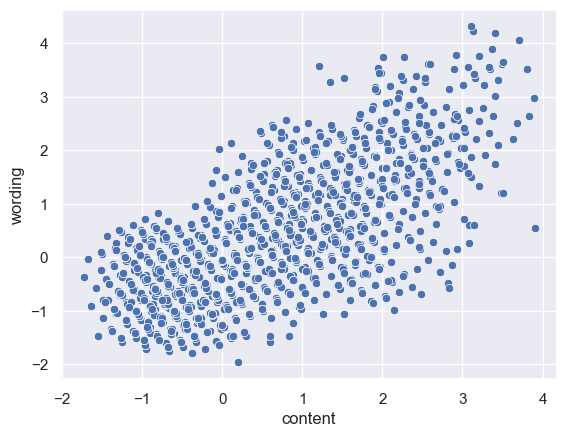

In [10]:
sns.scatterplot(x=summary_df["content"], y=summary_df["wording"])

<Axes: xlabel='content', ylabel='wording'>

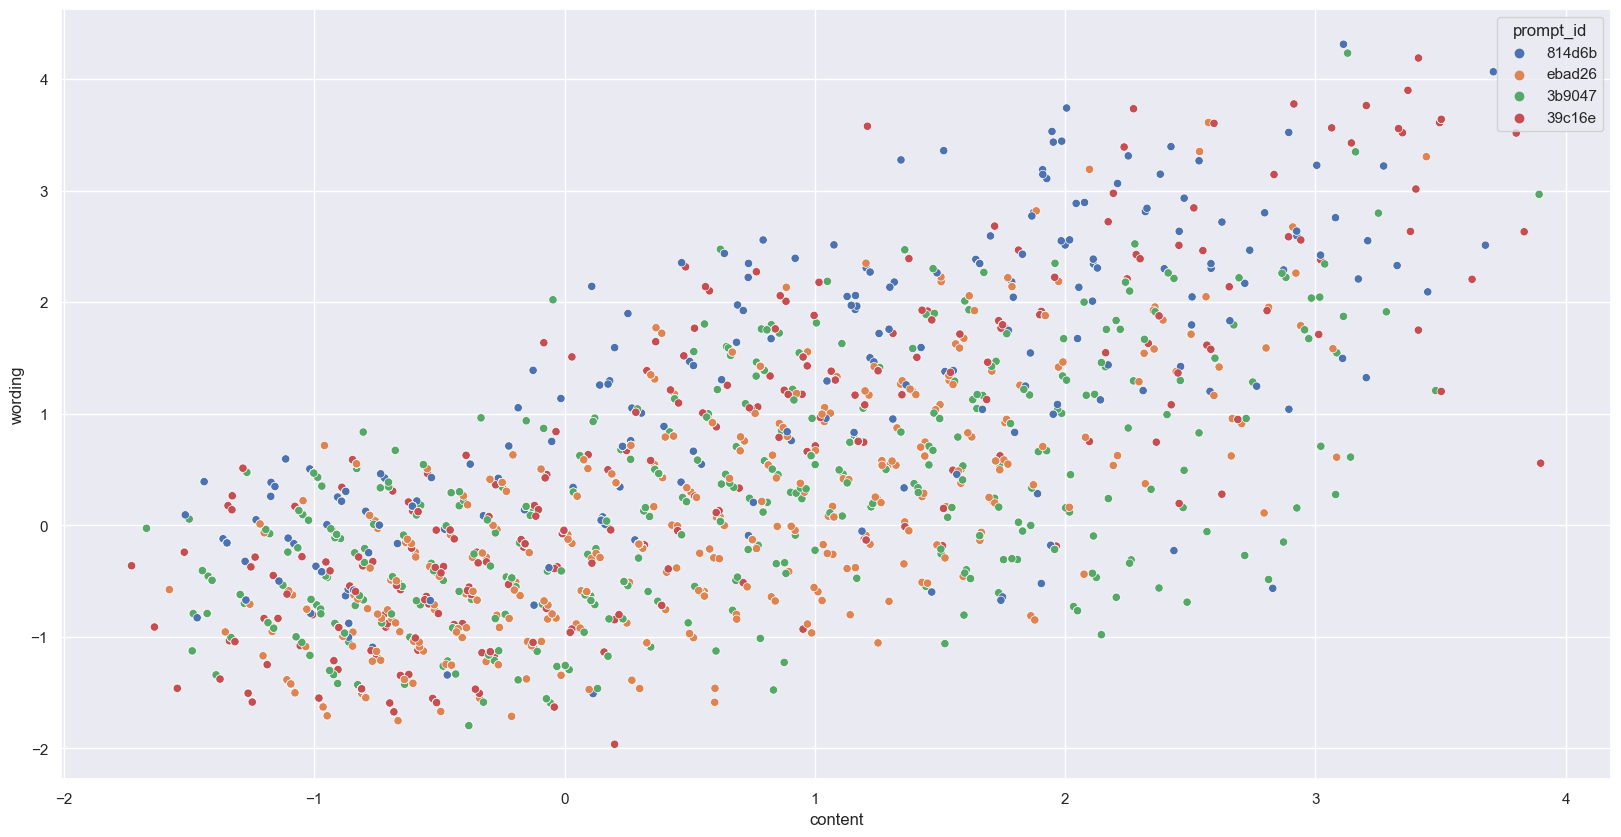

In [11]:
fig = plt.figure(figsize=(20, 10))
sns.scatterplot(x=summary_df["content"], y=summary_df["wording"], hue=summary_df["prompt_id"])

<Axes: xlabel='0', ylabel='1'>

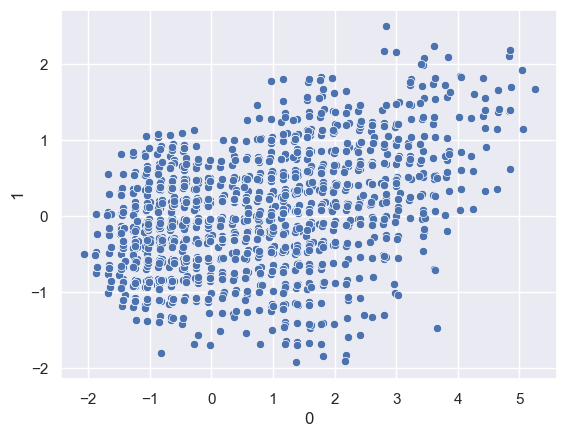

In [18]:
# 30度回転するとは？
angle_deg = 30
angle_rad = np.radians(angle_deg)
rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                            [np.sin(angle_rad), np.cos(angle_rad)]])
_temp_df = pd.DataFrame(summary_df[['content', 'wording']].values.dot(rotation_matrix))

sns.scatterplot(x=_temp_df[0], y=_temp_df[1])

In [11]:
summary_df[["content","wording"]].corr()

,content,wording
content,1.00000,0.75138
wording,0.75138,1.00000


In [12]:
# データの構成
summary_df[summary_df["student_id"]=="000e8c3c7ddb"]

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538


In [13]:
summary_df[summary_df["student_id"]=="000e8c3c7ddb"]["text"].values[0]

'The third wave was an experimentto see how people reacted to a new one leader government. It gained popularity as people wanted to try new things. The students follow anything that is said and start turning on eachother to gain higher power. They had to stop the experement as too many people got to radical with it blindly following there leader'

In [14]:
print(prompt_df[prompt_df["prompt_id"]=="814d6b"]["prompt_question"].values[0])
print("="*30)
print(prompt_df[prompt_df["prompt_id"] == "814d6b"]["prompt_title"].values[0])
print("="*30)
print(prompt_df[prompt_df["prompt_id"] == "814d6b"]["prompt_text"].values[0])

print("="*30)
print(summary_df[summary_df["student_id"]=="000e8c3c7ddb"]["text"].values[0])

Summarize how the Third Wave developed over such a short period of time and why the experiment was ended.
The Third Wave
Background 
The Third Wave experiment took place at Cubberley High School in Palo Alto, California during the first week of April 1967. History teacher Ron Jones, finding himself unable to explain to his students how people throughout history followed the crowd even when terrible things were happening, decided to demonstrate it to his students through an experiment. Jones announced that he was starting a movement aimed to eliminate democracy. Jones named the movement “The Third Wave” as a symbol of strength, referring to the mythical belief that the third in a series of waves is the strongest. One of the central points of this movement was that democracy’s main weakness is that it favors the individual over the whole community. Jones emphasized this main point of the movement when he created this catchy motto: “Strength through discipline, strength through community,

In [15]:
for text in prompt_df["prompt_text"].unique():
    print(text)
    print("="*30)

Chapter 13 
As the sequel to what has already been said, we must proceed to consider what the poet should aim at, and what he should avoid, in constructing his plots; and by what means the specific effect of Tragedy will be produced. 
A perfect tragedy should, as we have seen, be arranged not on the simple but on the complex plan. It should, moreover, imitate actions which excite pity and fear, this being the distinctive mark of tragic imitation. It follows plainly, in the first place, that the change of fortune presented must not be the spectacle of a virtuous man brought from prosperity to adversity: for this moves neither pity nor fear; it merely shocks us. Nor, again, that of a bad man passing from adversity to prosperity: for nothing can be more alien to the spirit of Tragedy; it possesses no single tragic quality; it neither satisfies the moral sense nor calls forth pity or fear. Nor, again, should the downfall of the utter villain be exhibited. A plot of this kind would, doubtle

In [29]:
# train_dfを作成する
train_df = pd.merge(prompt_df, summary_df, on="prompt_id", how="left")
train_df.head()

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.088882,-0.594710
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886


In [30]:
train_df["prompt_id"].value_counts()

prompt_id
39c16e    2057
3b9047    2009
ebad26    1996
814d6b    1103
Name: count, dtype: int64

In [18]:
# spell check
from spellchecker import SpellChecker
import nltk
nltk.download('punkt')

class SpChk(SpellChecker):
    def __init__(self, context_keywords=[]):
        super().__init__()
        self.word_frequency.load_words(context_keywords)

    def get_mispells(self, text):
        tokens = nltk.word_tokenize(text)
        mis_tokens = [token for token in self.unknown(tokens) if token.isalpha()]
        return mis_tokens, len(mis_tokens), len(mis_tokens)/len(text)
    
    def add_keywords(self, added_keywords):
        self.word_frequency.load_words(added_keywords)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kengo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
text = "I started my schooling as the majority did in my area, at the local primarry school."
my_checker = SpChk()
my_checker.get_mispells(text)

(['primarry'], 1, 0.011904761904761904)

In [20]:
# train_df内のデータを確認する
text = train_df["text"].values[0]
my_checker.get_mispells(text)

([], 0, 0.0)

In [21]:
# すべてのテキストに対して確認を行う
texts = []
mis_word_list = []
for text in train_df["text"].values:
    mis_words = my_checker.get_mispells(text)[0]
    if len(mis_words) > 0:
        texts.append(text)
        mis_word_list.append(mis_words)
        
mis_word_df = pd.DataFrame(
    {
        "text": texts,
        "mis_words": mis_word_list
    }
)
mis_word_df

,text,mis_words
0,The three elements of an ideal tragedy are: H...,[subplots]
1,The 3 ideal of tragedy is how complex you need...,"[ineretsed, happend, lasty, tragyed, comdey, p..."
2,"Tragedy much b complex, Tragedy much b complex...","[b, t]"
3,One element of a perfect tragery in Aristotle'...,"[tragin, plotlines, tragery, fraility, somply,..."
4,"In the second paragraph Aritole explained, ""A ...","[tradegy, aritole]"
...,...,...
4378,One way they covered up meat is they would rub...,"[upspoiled, aslo, ansd]"
4379,They would put various seasonings and flavors ...,[dmped]
4380,They would run it with soda to take away the s...,"[glyerin, borx]"
4381,"in the first paragraph it says ""either can it...",[machiene]


In [33]:
# 学生はユニーク数になっている？
print(train_df["student_id"].nunique())
print(len(train_df))

7165
7165


## text

In [27]:
for i in range(10):
    print(train_df[train_df["text"].str.contains("\n", regex=False)]["text"].values[i])
    print("="*30)

A tragedy must have a protagonist who is not clealy defined as a good or bad guy but an accident the occurs changes his life for the 
 worse.  The downfall of the main character should neither bring pity or fear because the protagonist is not similar to the person reading and the tragedy should not be so dramatic to bring emotions of pity or fear. The downfall of the protagonist should be caused by a great error or fratility, not by a villain or evil force.
At least 3 elements of an ideal tragedy,as described by Aristole is plot, character, and  thought.For example,in the text 
says,"Alcmaeon,Oedipus,Orestes,Meleager,Thyestes,and Telephus."This supports my claim  because it gives evidence about how one of the ideal tragedy is characters.In conclusion,at least 3 elements of an ideal tragedy as described by Aristole is plot,character,and thought.
it should follow a complex plan, imitate actions which excite pity and fear, and should have a character  who is  ¨a man who is not eminently
 

In [34]:
# train_dfでcontentとかが低い文章
train_df[train_df["content"]<-1]

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording
5,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00db6d2b9222,"Tragedy much b complex, Tragedy much b complex...",-1.547163,-1.461245
7,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,011acba6c31c,It should have a character that people can rel...,-1.264214,-1.505073
9,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,016714bf867a,"In the second paragraph Aritole explained, ""A ...",-1.547163,-1.461245
14,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,01f859d90ae0,"It should not be simple it should be complex ,...",-1.264214,-1.505073
35,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,042d742a4b04,it should start with a complex plan which will...,-1.344534,0.176041
...,...,...,...,...,...,...,...,...
7129,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",fbcf15f2d6ee,"They would can it, make it into sausage, pickl...",-1.355562,-0.955801
7131,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",fc2fde1b9663,They would rub the meat so it won't smell. bas...,-1.547163,-1.461245
7137,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",fd1eee475739,Ways they would cover up the spoiled meat woul...,-1.093523,-1.421992
7140,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",fd272e43c4e0,they would use the pickle to get the smell to ...,-1.547163,-1.461245


## FOLD

In [35]:
from sklearn.model_selection import GroupKFold
fold = GroupKFold(n_splits=4)

for n, (train_index, val_index) in enumerate(fold.split(train_df, groups=train_df["prompt_id"])):
    train_df.loc[val_index, "fold"] = int(n)

In [36]:
train_df["fold"] = train_df["fold"].astype(int)

In [37]:
train_df.groupby(["fold", "prompt_id"]).count()

,,prompt_question,prompt_title,prompt_text,student_id,text,content,wording
fold,prompt_id,,,,,,,
0,39c16e,2057,2057,2057,2057,2057,2057,2057
1,3b9047,2009,2009,2009,2009,2009,2009,2009
2,ebad26,1996,1996,1996,1996,1996,1996,1996
3,814d6b,1103,1103,1103,1103,1103,1103,1103


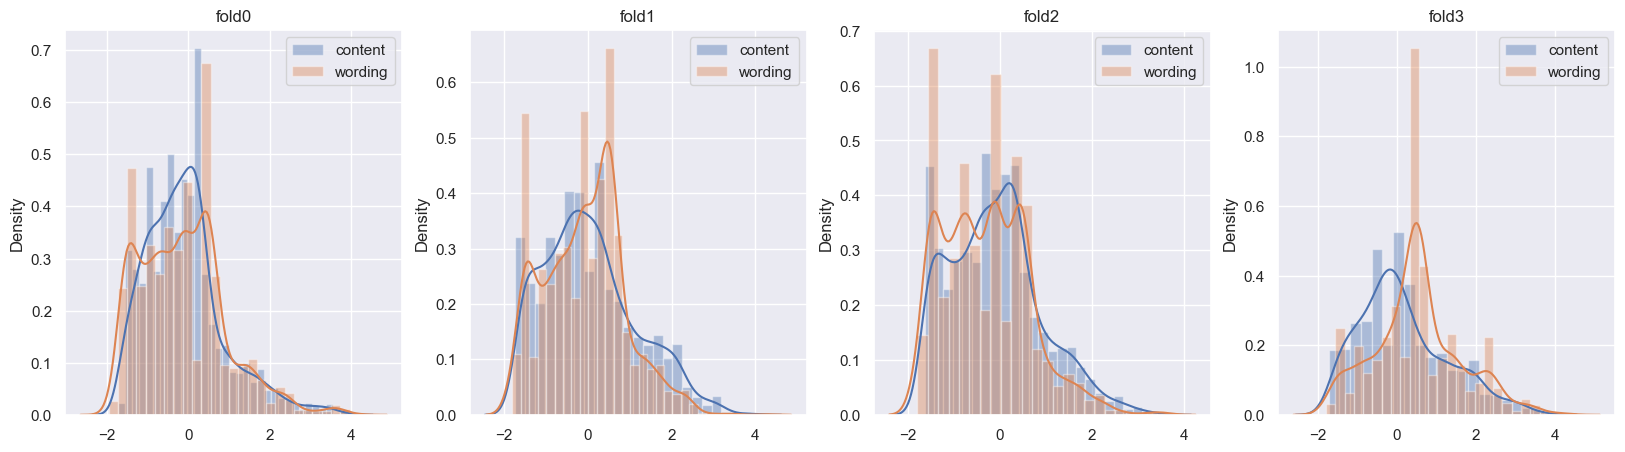

In [38]:
# 目的変数の分布を確認する
import warnings
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i in range(4):
    sns.distplot(
        x=train_df[train_df["fold"]==i]["content"],
        ax=ax[i],
        label="content"
    )
    sns.distplot(
        x=train_df[train_df["fold"]==i]["wording"],
        ax=ax[i],
        label="wording"
    )
    ax[i].set_title(f"fold{i}")
    ax[i].legend()
plt.show()

In [39]:
train_df.groupby(["fold"])[["content", "wording"]].mean()

,content,wording
fold,,
0,-0.095457,-0.140749
1,0.049579,-0.068542
2,-0.087906,-0.299023
3,0.150306,0.518733


## MultiLabelStratifiedKFold

In [40]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
fold = MultilabelStratifiedKFold(
    n_splits=4, shuffle=True, random_state=2023
)
for n, (train_index, val_index) in enumerate(fold.split(train_df, train_df[["content", "wording"]])):
    train_df.loc[val_index, "fold"] = int(n)

In [41]:
train_df.groupby(["fold", "prompt_id"]).count()

prompt_question  prompt_title  prompt_text  student_id  text  \
fold prompt_id                                                                 
0    39c16e                 515           515          515         515   515   
     3b9047                 500           500          500         500   500   
     814d6b                 281           281          281         281   281   
     ebad26                 495           495          495         495   495   
1    39c16e                 531           531          531         531   531   
     3b9047                 501           501          501         501   501   
     814d6b                 288           288          288         288   288   
     ebad26                 472           472          472         472   472   
2    39c16e                 525           525          525         525   525   
     3b9047                 514           514          514         514   514   
     814d6b                 271           271          271         271   271   
     ebad26                 481           481          481         481   481   
3    39c16e                 486           486          486         486   486   
     3b9047                 494           494          494         494   494   
     814d6b                 263           263          263         263   263   
     ebad26                 548           548          548         548   548   

                content  wording  
fold prompt_id                    
0    39c16e         515      515  
     3b9047         500      500  
     814d6b         281      281  
     ebad26         495      495  
1    39c16e         531      531  
     3b9047         501      501  
     814d6b         288      288  
     ebad26         472      472  
2    39c16e         525      525  
     3b9047         514      514  
     814d6b         271      271  
     ebad26         481      481  
3    39c16e         486      486  
     3b9047         494      494  
     814d6b         263      263  
     ebad26         548      548

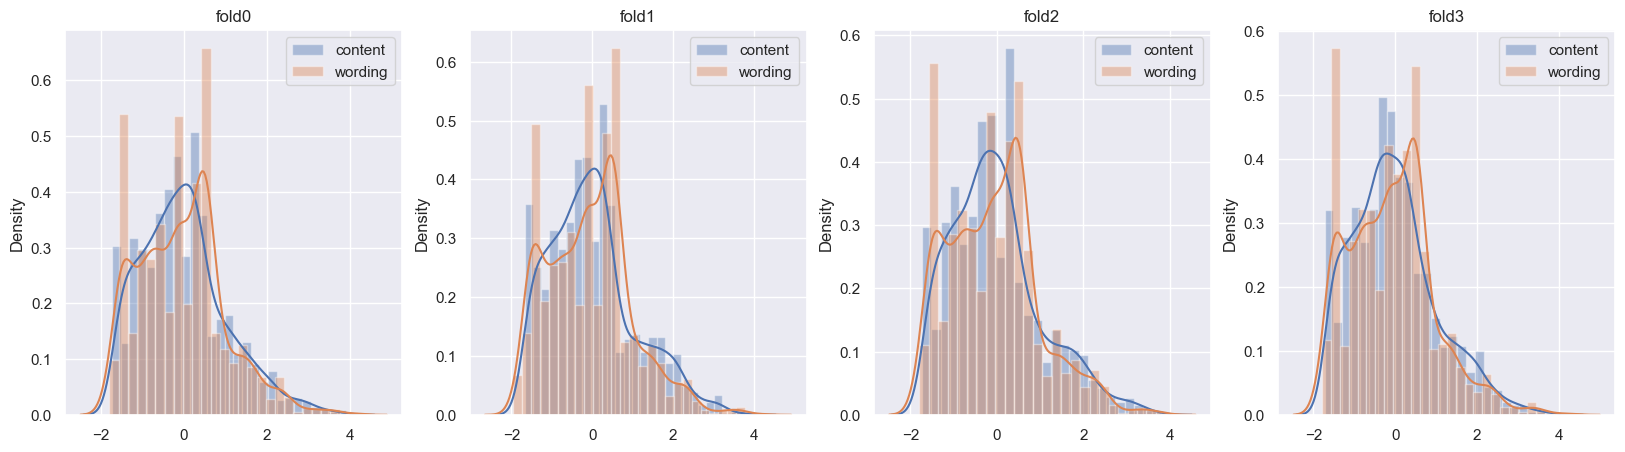

In [42]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i in range(4):
    sns.distplot(
        x=train_df[train_df["fold"]==i]["content"],
        ax=ax[i],
        label="content"
    )
    sns.distplot(
        x=train_df[train_df["fold"]==i]["wording"],
        ax=ax[i],
        label="wording"
    )
    ax[i].set_title(f"fold{i}")
    ax[i].legend()
plt.show()

In [43]:
train_df.groupby(["fold"])[["content", "wording"]].mean()

,content,wording
fold,,
0,-0.013108,-0.051374
1,-0.001837,-0.057638
2,-0.019595,-0.067162
3,-0.024879,-0.076117


In [44]:
## MultiLabelStratifiedKFoldで目的変数に書き換える
df = train_df.copy()
y = pd.get_dummies(data=df[["content", "wording"]], columns=["content", "wording"])
fold = MultilabelStratifiedKFold(
    n_splits=4, shuffle=True, random_state=2023
)
for n, (train_index, val_index) in enumerate(fold.split(train_df, y)):
    train_df.loc[val_index, "fold"] = int(n)
train_df["fold"] = train_df["fold"].astype(int)

In [45]:
train_df.groupby(["fold", "prompt_id"]).count()

prompt_question  prompt_title  prompt_text  student_id  text  \
fold prompt_id                                                                 
0    39c16e                 521           521          521         521   521   
     3b9047                 518           518          518         518   518   
     814d6b                 264           264          264         264   264   
     ebad26                 489           489          489         489   489   
1    39c16e                 504           504          504         504   504   
     3b9047                 500           500          500         500   500   
     814d6b                 288           288          288         288   288   
     ebad26                 499           499          499         499   499   
2    39c16e                 529           529          529         529   529   
     3b9047                 480           480          480         480   480   
     814d6b                 277           277          277         277   277   
     ebad26                 505           505          505         505   505   
3    39c16e                 503           503          503         503   503   
     3b9047                 511           511          511         511   511   
     814d6b                 274           274          274         274   274   
     ebad26                 503           503          503         503   503   

                content  wording  
fold prompt_id                    
0    39c16e         521      521  
     3b9047         518      518  
     814d6b         264      264  
     ebad26         489      489  
1    39c16e         504      504  
     3b9047         500      500  
     814d6b         288      288  
     ebad26         499      499  
2    39c16e         529      529  
     3b9047         480      480  
     814d6b         277      277  
     ebad26         505      505  
3    39c16e         503      503  
     3b9047         511      511  
     814d6b         274      274  
     ebad26         503      503

In [46]:
y

,content_-1.72985945253881,content_-1.67021923482261,content_-1.63851133466335,content_-1.57887111694714,content_-1.54716321678788,content_-1.51923089923094,content_-1.51522532775967,content_-1.4995278696141,content_-1.48752299907168,content_-1.4835174276004,...,wording_3.63812632907257,wording_3.73269719382752,wording_3.73923297437945,wording_3.7614216237999,wording_3.77556381837151,wording_3.89794064266612,wording_4.06410256193744,wording_4.18739785666477,wording_4.23122555224945,wording_4.3106931513921
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7161,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7162,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7163,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


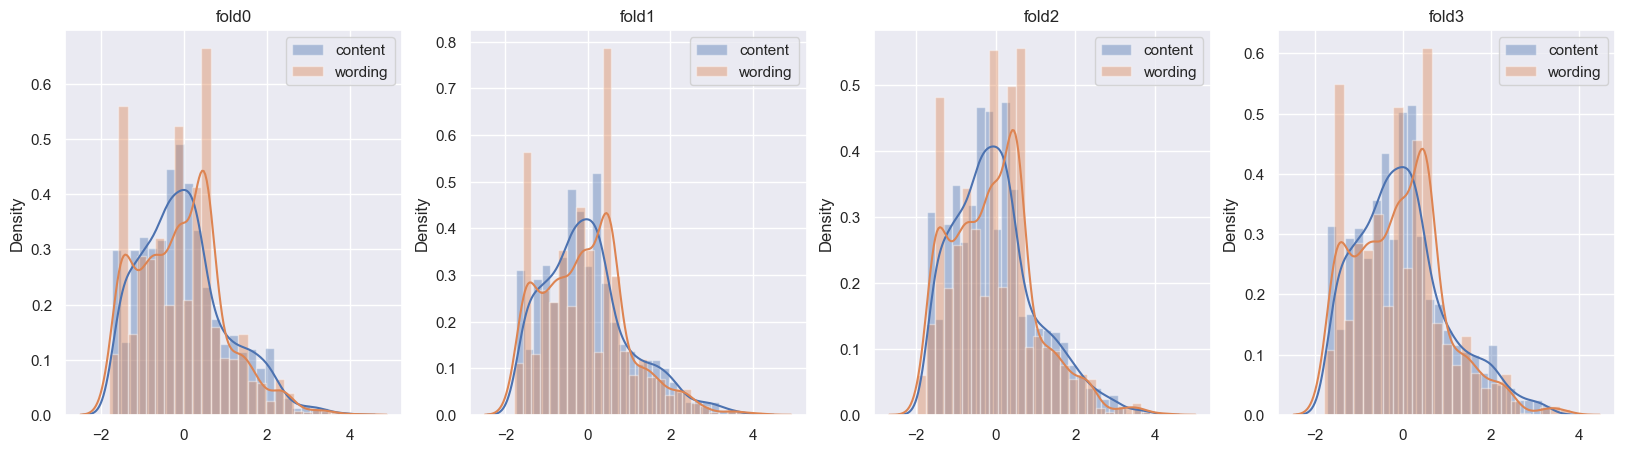

In [47]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i in range(4):
    sns.distplot(
        x=train_df[train_df["fold"]==i]["content"],
        ax=ax[i],
        label="content"
    )
    sns.distplot(
        x=train_df[train_df["fold"]==i]["wording"],
        ax=ax[i],
        label="wording"
    )
    ax[i].set_title(f"fold{i}")
    ax[i].legend()
plt.show()

In [48]:
train_df.groupby(["fold"])[["content", "wording"]].mean()

,content,wording
fold,,
0,-0.012328,-0.071026
1,-0.007300,-0.057425
2,-0.016715,-0.054855
3,-0.023070,-0.068977


In [49]:
# Bin化した目的変数を作成してfoldに入力する
n = 100
train_df["bin_content"] = pd.cut(train_df["content"], bins=n, labels=list(range(n)))
train_df["bin_wording"] = pd.cut(train_df["wording"], bins=n, labels=list(range(n)))

fold = MultilabelStratifiedKFold(
    n_splits=4, shuffle=True, random_state=2023
)
for n, (train_index, val_index) in enumerate(
    fold.split(train_df, train_df[["bin_content", "bin_wording"]])
):
    train_df.loc[val_index, "fold"] = int(n)

In [50]:
train_df.groupby(["fold", "prompt_id"]).count()

prompt_question  prompt_title  prompt_text  student_id  text  \
fold prompt_id                                                                 
0    39c16e                 517           517          517         517   517   
     3b9047                 485           485          485         485   485   
     814d6b                 280           280          280         280   280   
     ebad26                 509           509          509         509   509   
1    39c16e                 514           514          514         514   514   
     3b9047                 513           513          513         513   513   
     814d6b                 286           286          286         286   286   
     ebad26                 478           478          478         478   478   
2    39c16e                 513           513          513         513   513   
     3b9047                 491           491          491         491   491   
     814d6b                 272           272          272         272   272   
     ebad26                 516           516          516         516   516   
3    39c16e                 513           513          513         513   513   
     3b9047                 520           520          520         520   520   
     814d6b                 265           265          265         265   265   
     ebad26                 493           493          493         493   493   

                content  wording  bin_content  bin_wording  
fold prompt_id                                              
0    39c16e         517      517          517          517  
     3b9047         485      485          485          485  
     814d6b         280      280          280          280  
     ebad26         509      509          509          509  
1    39c16e         514      514          514          514  
     3b9047         513      513          513          513  
     814d6b         286      286          286          286  
     ebad26         478      478          478          478  
2    39c16e         513      513          513          513  
     3b9047         491      491          491          491  
     814d6b         272      272          272          272  
     ebad26         516      516          516          516  
3    39c16e         513      513          513          513  
     3b9047         520      520          520          520  
     814d6b         265      265          265          265  
     ebad26         493      493          493          493

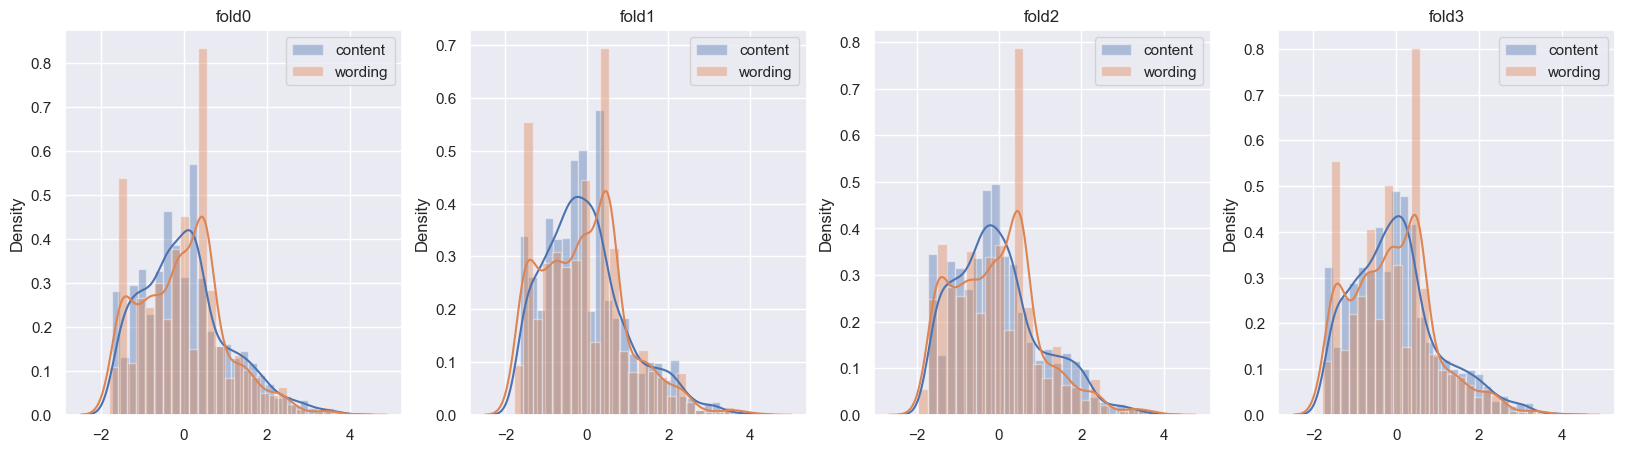

In [51]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i in range(4):
    sns.distplot(
        x=train_df[train_df["fold"]==i]["content"],
        ax=ax[i],
        label="content"
    )
    sns.distplot(
        x=train_df[train_df["fold"]==i]["wording"],
        ax=ax[i],
        label="wording"
    )
    ax[i].set_title(f"fold{i}")
    ax[i].legend()
plt.show()

In [52]:
train_df.groupby(["fold"])[["content", "wording"]].mean()

,content,wording
fold,,
0,0.023807,-0.028330
1,-0.032754,-0.065426
2,-0.033484,-0.072697
3,-0.016969,-0.085828


## StratifiedKFold

In [53]:
from sklearn.model_selection import StratifiedKFold
train_df["fold"] = -1
fold = StratifiedKFold(
    n_splits=4, shuffle=True, random_state=2023
)
for n, (train_index, val_index) in enumerate(fold.split(train_df, train_df["prompt_id"])):
    train_df.loc[val_index, "fold"] = n
train_df["fold"] = train_df["fold"].astype(int)

In [54]:
train_df.groupby(["fold", "prompt_id"]).count()

prompt_question  prompt_title  prompt_text  student_id  text  \
fold prompt_id                                                                 
0    39c16e                 515           515          515         515   515   
     3b9047                 502           502          502         502   502   
     814d6b                 276           276          276         276   276   
     ebad26                 499           499          499         499   499   
1    39c16e                 514           514          514         514   514   
     3b9047                 503           503          503         503   503   
     814d6b                 275           275          275         275   275   
     ebad26                 499           499          499         499   499   
2    39c16e                 514           514          514         514   514   
     3b9047                 502           502          502         502   502   
     814d6b                 276           276          276         276   276   
     ebad26                 499           499          499         499   499   
3    39c16e                 514           514          514         514   514   
     3b9047                 502           502          502         502   502   
     814d6b                 276           276          276         276   276   
     ebad26                 499           499          499         499   499   

                content  wording  bin_content  bin_wording  
fold prompt_id                                              
0    39c16e         515      515          515          515  
     3b9047         502      502          502          502  
     814d6b         276      276          276          276  
     ebad26         499      499          499          499  
1    39c16e         514      514          514          514  
     3b9047         503      503          503          503  
     814d6b         275      275          275          275  
     ebad26         499      499          499          499  
2    39c16e         514      514          514          514  
     3b9047         502      502          502          502  
     814d6b         276      276          276          276  
     ebad26         499      499          499          499  
3    39c16e         514      514          514          514  
     3b9047         502      502          502          502  
     814d6b         276      276          276          276  
     ebad26         499      499          499          499

In [55]:
summary_test_df = pd.read_csv("../inputs/summaries_test.csv")
prompt_test_df = pd.read_csv("../inputs/prompts_test.csv")

In [56]:
prompt_test_df

,prompt_id,prompt_question,prompt_title,prompt_text
0,abc123,Summarize...,Example Title 1,Heading\nText...
1,def789,Summarize...,Example Title 2,Heading\nText...


In [57]:
# このトークンで変換しても問題なさそう
train_df[train_df["text"].str.contains("\|")]

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording,fold,bin_content,bin_wording


In [58]:
train_df[train_df["text"].str.contains("\n\n", regex=False)]

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording,fold,bin_content,bin_wording
2603,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,43c0311f0314,Skilled workers such as physicians and craftsm...,-1.547163,-1.461245,2,3,7
2805,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,5e830ce28327,Soldiers fought in wars or quelled domestic up...,-0.382272,-1.795491,0,23,2
3285,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,9ce22466ec4c,The Egyptians also elevated\n some human being...,-0.964718,-1.628368,1,13,5
3344,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,a4b7d5a3d897,in ancient egyptian the sicitay is an primied ...,-0.484352,-0.494565,3,22,23
3566,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,c2eb44ad9971,\nRight below the pharaoh in status were power...,-0.981265,-1.548900,0,13,6
3821,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,e31537ef86ad,Right below the pharaoh in status were powerfu...,-0.140912,-0.245279,0,28,27
4586,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,785fe1c214e5,lied to students by announcing that the Third ...,-1.547163,-1.461245,0,3,7


In [59]:
train_df[train_df["text"].str.contains("\n", regex=False)]

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording,fold,bin_content,bin_wording
745,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,5bb7bcf7af2c,A tragedy must have a protagonist who is not c...,0.205683,0.380538,2,34,37
1003,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,7a6cdbf3978c,"At least 3 elements of an ideal tragedy,as des...",-0.548304,0.506755,1,20,39
1241,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,96ef8cb55321,"it should follow a complex plan, imitate actio...",-0.639882,-1.382738,3,19,9
1998,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,f828010b8a63,that the public is identified with the charact...,-0.921625,-1.213611,0,14,11
2064,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,00fca047f40f,"Farmers tended the fields, raised animals, kep...",-0.382272,-1.795491,1,23,2
2352,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,23f978250c4a,\nImage result for egyptian ancient\nFor almos...,-1.547163,-1.461245,2,3,7
2395,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,29536be03197,The pharos were at the top of the social struc...,0.814317,0.540164,2,45,39
2603,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,43c0311f0314,Skilled workers such as physicians and craftsm...,-1.547163,-1.461245,2,3,7
2635,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,47bbda46bab5,The different social classes were involved ...,-0.040890,-1.629329,1,29,5
2805,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,5e830ce28327,Soldiers fought in wars or quelled domestic up...,-0.382272,-1.795491,0,23,2


In [60]:
train_df[train_df["prompt_id"]=="39c16e"].sort_values("wording", ascending=False).iloc[0]["text"]

'A true tragedy features many elements of misfortune and few of good luck. In this passage,  Aristotle outlines the faults in some so called "tragedies," and what caused others to succeed. The entire point of tragedy is to invoke a deep and true feeling of pity or sadness in the reader, something they can relate to on some level. a man going from rich to poor does not invoke these feelings, and neither does a man going from rags to riches. Villians falling and heroes rising cause opposite emotions than what is to be striven for in a tragedy, so a true tragedy has to have a merely ok character, usually with a moral compass that is skewed. As the focus on this one mediocre man, they shouldn\'t be taken on tangents that stray from the one main topic of the story of this man. A tragedy written to please the readers like The Odyssey, oftentimes more resembles the plot of a comedy than a tragedy. We have been able to infer from this article that a good tragedy follows at least 3 very importa

In [61]:
train_df[train_df["prompt_id"]=="39c16e"].sort_values("wording", ascending=False).iloc[-1]["text"]

'The ideal tragedy should imitate actions that excite pity and fear. Pity is aroused by unmerited misfortune, fear by the misfortune of a man like ourselves. A well-constructed plot should, therefore, be single in its issue, rather than double as some maintain. It should come about as the result, not of vice, but of some great error or frailty, in a character either such as we have described, or better rather than worse. A tragedy, then, to be perfect according to the rules of art, should be of this construction. Hence they are in error who censure Euripides just because he follows this principle in his plays, many of which end unhappily. '

In [62]:
train_df[train_df["text"].str.contains("\n", regex=False)].iloc[7]["text"]

'Skilled workers such as physicians and craftsmen/women made up the middle class. Craftsmen made and sold jewelry, pottery, papyrus\n products, tools, and other useful things.\n\n'

In [63]:
print(train_df[train_df["text"].str.contains("\n\n", regex=False)].iloc[3]["text"])

in ancient egyptian the sicitay is an primied by node is the secod of the of the primed  it belowed the pharon''Right below the pharaoh in status were powerful nobles and priests. Only nobles could hold government posts; in these positions they profited from tributes paid to the pharaoh. Priests were responsible for pleasing the gods'' and they also grow welthy. and the solider fought in war and qulled domestic up spring  and even sometime wach the slave when they building  primed ''
''Soldiers fought in wars or quelled domestic uprisings. During long periods of peace, soldiers also supervised the peasants, farmers, and slaves who were involved in building such structures as pyramids and palaces.''

Naturally, there were people needed to buy goods from artisans and traders. These were the merchants and storekeepers who sold these goods to the public.


In [64]:
print(train_df[train_df["prompt_text"].str.contains("\n", regex=False)].iloc[0]["prompt_text"])

Chapter 13 
As the sequel to what has already been said, we must proceed to consider what the poet should aim at, and what he should avoid, in constructing his plots; and by what means the specific effect of Tragedy will be produced. 
A perfect tragedy should, as we have seen, be arranged not on the simple but on the complex plan. It should, moreover, imitate actions which excite pity and fear, this being the distinctive mark of tragic imitation. It follows plainly, in the first place, that the change of fortune presented must not be the spectacle of a virtuous man brought from prosperity to adversity: for this moves neither pity nor fear; it merely shocks us. Nor, again, that of a bad man passing from adversity to prosperity: for nothing can be more alien to the spirit of Tragedy; it possesses no single tragic quality; it neither satisfies the moral sense nor calls forth pity or fear. Nor, again, should the downfall of the utter villain be exhibited. A plot of this kind would, doubtle

In [65]:
train_df[train_df["prompt_text"].str.contains("\n", regex=False)].iloc[0]["prompt_text"]

'Chapter 13 \r\nAs the sequel to what has already been said, we must proceed to consider what the poet should aim at, and what he should avoid, in constructing his plots; and by what means the specific effect of Tragedy will be produced. \r\nA perfect tragedy should, as we have seen, be arranged not on the simple but on the complex plan. It should, moreover, imitate actions which excite pity and fear, this being the distinctive mark of tragic imitation. It follows plainly, in the first place, that the change of fortune presented must not be the spectacle of a virtuous man brought from prosperity to adversity: for this moves neither pity nor fear; it merely shocks us. Nor, again, that of a bad man passing from adversity to prosperity: for nothing can be more alien to the spirit of Tragedy; it possesses no single tragic quality; it neither satisfies the moral sense nor calls forth pity or fear. Nor, again, should the downfall of the utter villain be exhibited. A plot of this kind would, 

In [66]:
train_df[train_df["prompt_text"].str.contains("\r\n", regex=False)]

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording,fold,bin_content,bin_wording
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415,1,26,23
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058,0,13,24
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181,0,23,21
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.088882,-0.594710,1,32,21
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886,3,18,23
...,...,...,...,...,...,...,...,...,...,...,...
7160,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff37545b2805,"In paragraph two, they would use pickle meat a...",1.520355,-0.292990,0,57,26
7161,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff4ed38ef099,"in the first paragraph it says ""either can it...",-1.204574,-1.169784,3,9,12
7162,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff53b94f7ce0,They would have piles of filthy meat on the fl...,0.328739,-1.053294,2,36,14
7163,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff7c7e70df07,They used all sorts of chemical concoctions to...,0.205683,0.380538,0,34,37


In [78]:
train_df[train_df["text"].str.contains(":")]["text"].values[0]

"The three elements of an ideal tragedy are:  Having a character that isn't bad have misfortune befall them.,  Having no subplots, and ending in death.  "

In [60]:
from transformers import DebertaTokenizer

sample_text = train_df[train_df["text"].str.contains("\n")]["text"].values[0]
sample_text2 = 'A tragedy must have a protagonist who is not clealy defined as a good or bad guy but an accident the occurs changes his life for the | worse.  The downfall of the main character should neither bring pity or fear because the protagonist is not similar to the person reading and the tragedy should not be so dramatic to bring emotions of pity or fear. The downfall of the protagonist should be caused by a great error or fratility, not by a villain or evil force.'

tokenizer = DebertaTokenizer.from_pretrained('microsoft/deberta-base')
tokens = tokenizer.tokenize(sample_text)
print(tokens)
print("="*30)
print(tokenizer(sample_text)["input_ids"])
print("="*30)
print(tokenizer.convert_ids_to_tokens(tokenizer(sample_text)["input_ids"]))

['A', 'Ġtragedy', 'Ġmust', 'Ġhave', 'Ġa', 'Ġprotagonist', 'Ġwho', 'Ġis', 'Ġnot', 'Ġcle', 'aly', 'Ġdefined', 'Ġas', 'Ġa', 'Ġgood', 'Ġor', 'Ġbad', 'Ġguy', 'Ġbut', 'Ġan', 'Ġaccident', 'Ġthe', 'Ġoccurs', 'Ġchanges', 'Ġhis', 'Ġlife', 'Ġfor', 'Ġthe', 'Ġ', 'Ċ', 'Ġworse', '.', 'Ġ', 'ĠThe', 'Ġdownfall', 'Ġof', 'Ġthe', 'Ġmain', 'Ġcharacter', 'Ġshould', 'Ġneither', 'Ġbring', 'Ġpity', 'Ġor', 'Ġfear', 'Ġbecause', 'Ġthe', 'Ġprotagonist', 'Ġis', 'Ġnot', 'Ġsimilar', 'Ġto', 'Ġthe', 'Ġperson', 'Ġreading', 'Ġand', 'Ġthe', 'Ġtragedy', 'Ġshould', 'Ġnot', 'Ġbe', 'Ġso', 'Ġdramatic', 'Ġto', 'Ġbring', 'Ġemotions', 'Ġof', 'Ġpity', 'Ġor', 'Ġfear', '.', 'ĠThe', 'Ġdownfall', 'Ġof', 'Ġthe', 'Ġprotagonist', 'Ġshould', 'Ġbe', 'Ġcaused', 'Ġby', 'Ġa', 'Ġgreat', 'Ġerror', 'Ġor', 'Ġfr', 'atility', ',', 'Ġnot', 'Ġby', 'Ġa', 'Ġvillain', 'Ġor', 'Ġevil', 'Ġforce', '.']
[1, 250, 6906, 531, 33, 10, 24587, 54, 16, 45, 12479, 7776, 6533, 25, 10, 205, 50, 1099, 2173, 53, 41, 3213, 5, 11493, 1022, 39, 301, 13, 5, 1437, 50118, 3007

In [59]:
# 改行を|に変換すると？
sample_text2 = 'A tragedy must have a protagonist who is not clealy defined as a good or bad guy but an accident the occurs changes his life for the | worse.  The downfall of the main character should neither bring pity or fear because the protagonist is not similar to the person reading and the tragedy should not be so dramatic to bring emotions of pity or fear. The downfall of the protagonist should be caused by a great error or fratility, not by a villain or evil force.'

tokenizer = DebertaTokenizer.from_pretrained('microsoft/deberta-base')
tokens = tokenizer.tokenize(sample_text2)
print(tokens)
print("="*30)
print(tokenizer(sample_text2)["input_ids"])
print("="*30)
print(tokenizer.convert_ids_to_tokens(tokenizer(sample_text2)["input_ids"]))

['A', 'Ġtragedy', 'Ġmust', 'Ġhave', 'Ġa', 'Ġprotagonist', 'Ġwho', 'Ġis', 'Ġnot', 'Ġcle', 'aly', 'Ġdefined', 'Ġas', 'Ġa', 'Ġgood', 'Ġor', 'Ġbad', 'Ġguy', 'Ġbut', 'Ġan', 'Ġaccident', 'Ġthe', 'Ġoccurs', 'Ġchanges', 'Ġhis', 'Ġlife', 'Ġfor', 'Ġthe', 'Ġ|', 'Ġworse', '.', 'Ġ', 'ĠThe', 'Ġdownfall', 'Ġof', 'Ġthe', 'Ġmain', 'Ġcharacter', 'Ġshould', 'Ġneither', 'Ġbring', 'Ġpity', 'Ġor', 'Ġfear', 'Ġbecause', 'Ġthe', 'Ġprotagonist', 'Ġis', 'Ġnot', 'Ġsimilar', 'Ġto', 'Ġthe', 'Ġperson', 'Ġreading', 'Ġand', 'Ġthe', 'Ġtragedy', 'Ġshould', 'Ġnot', 'Ġbe', 'Ġso', 'Ġdramatic', 'Ġto', 'Ġbring', 'Ġemotions', 'Ġof', 'Ġpity', 'Ġor', 'Ġfear', '.', 'ĠThe', 'Ġdownfall', 'Ġof', 'Ġthe', 'Ġprotagonist', 'Ġshould', 'Ġbe', 'Ġcaused', 'Ġby', 'Ġa', 'Ġgreat', 'Ġerror', 'Ġor', 'Ġfr', 'atility', ',', 'Ġnot', 'Ġby', 'Ġa', 'Ġvillain', 'Ġor', 'Ġevil', 'Ġforce', '.']
[1, 250, 6906, 531, 33, 10, 24587, 54, 16, 45, 12479, 7776, 6533, 25, 10, 205, 50, 1099, 2173, 53, 41, 3213, 5, 11493, 1022, 39, 301, 13, 5, 1721, 3007, 4, 1437, 

In [50]:
# スコア高いのは？
train_df.sort_values("content", ascending=False).iloc[0]["text"]

'As described by Aristotle, three elements of an ideal tragedy would be that the plot should feature the downfall of a man who is not completely evil but who has a flaw which causes his downfall, that it should cause fear and pity in the audience, and that it should have a complex plot, but not a plot with two thread that has two different catastrophes for the good and the bad.  Aristotle  believes that the goal of a tragedy is to "imitate actions which excite pity and fear" and argues that in order for the tragedy to accomplish this goal, it should feature the downfall of a hero "who is neiter eminently good and just, yet whose misfortune is brought on not by vice or depravity, but by some error of judgement or frailty." He thinks that if the hero were purely good, his downfall would simply be shocking to the audience, whereas the downfall of a purely evil man would not arouse pity or fear, since "pity is aroused by unmerited misfortune, fear by the misfortune of a man like ourselves"

In [51]:
train_df.sort_values("content", ascending=True).iloc[0]["text"]

'A tragedy can both be a good and bad thing, it can lead to the downfall of a hero or be somewhat comicle. Shows great error or frailty in a character'

In [73]:
print(train_df[~train_df["text"].str.contains('"')]["content"].values[0])
train_df[~train_df["text"].str.contains('"')]["text"].values[0]


-0.210613934166593


'1 element of an ideal tragedy is that it should be arranged on a complex plan.  Another element of an ideal tragedy is that it should only have one main issue. The last element of an ideal tragedy is that it should have a double thread plot and an opposite catastrophe for both good and bad.'

## OOFの結果

In [72]:
!dir

 ドライブ C のボリューム ラベルがありません。
 ボリューム シリアル番号は 1E5F-CACF です

 C:\Users\kengo\Desktop\Workspace\CommonLit2023\notebooks のディレクトリ

2023/08/12  19:12    <DIR>          .
2023/08/09  23:07    <DIR>          ..
2023/08/11  18:32           716,913 Out_31.csv
2023/08/12  19:12         1,136,693 test.ipynb
               2 個のファイル           1,853,606 バイト
               2 個のディレクトリ  715,110,797,312 バイトの空き領域


In [63]:
oof_df = pd.read_csv("../outputs/070/oof_df.csv")
oof_df

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording,full_text,fold,pred_content,pred_wording
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415,Summarize at least 3 elements of an ideal trag...,0,0.051434,0.251369
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058,Summarize at least 3 elements of an ideal trag...,0,-1.229856,-1.195720
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181,Summarize at least 3 elements of an ideal trag...,0,-0.077511,-0.277876
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.088882,-0.594710,Summarize at least 3 elements of an ideal trag...,0,0.134062,0.644540
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886,Summarize at least 3 elements of an ideal trag...,0,-0.531709,-0.670412
...,...,...,...,...,...,...,...,...,...,...,...,...
7160,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,fe1e3c528e24,The third wave experiment developed quick...,3.020803,2.421200,Summarize how the Third Wave developed over su...,3,1.760612,2.022512
7161,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,fe6fac61dc49,Mr jones started the third wave as a expereme...,1.221089,2.269070,Summarize how the Third Wave developed over su...,3,0.175859,0.899393
7162,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,fed33a5f383e,The Third Wave gained over 200 members by the ...,2.141224,1.123777,Summarize how the Third Wave developed over su...,3,1.321318,1.490627
7163,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,fefd4f143fbe,The Third Wave developed over such a short tim...,-0.782641,-0.245970,Summarize how the Third Wave developed over su...,3,-0.820700,-0.296910


1 element of an ideal tragedy is that it should be arranged on a complex plan.  Another element of an ideal tragedy is that it should only have one main issue. The last element of an ideal tragedy is that it should have a double thread plot and an opposite catastrophe for both good and bad.


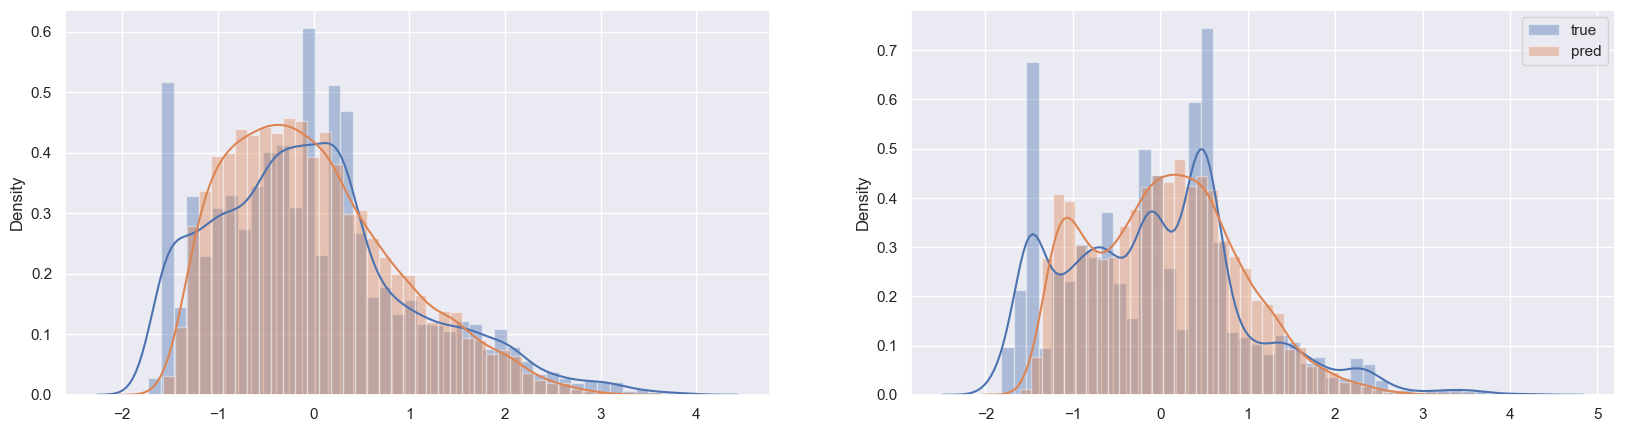

In [66]:
# 予測結果と正解データの分布を確認する
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.distplot(
    x=oof_df["content"],
    ax=ax[0],
    label="true"
)
sns.distplot(
    x=oof_df["pred_content"],
    ax=ax[0],
    label="pred"
)

sns.distplot(
    x=oof_df["wording"],
    ax=ax[1],
    label="true"
)
sns.distplot(
    x=oof_df["pred_wording"],
    ax=ax[1],
    label="pred"
)
plt.legend()
plt.show()

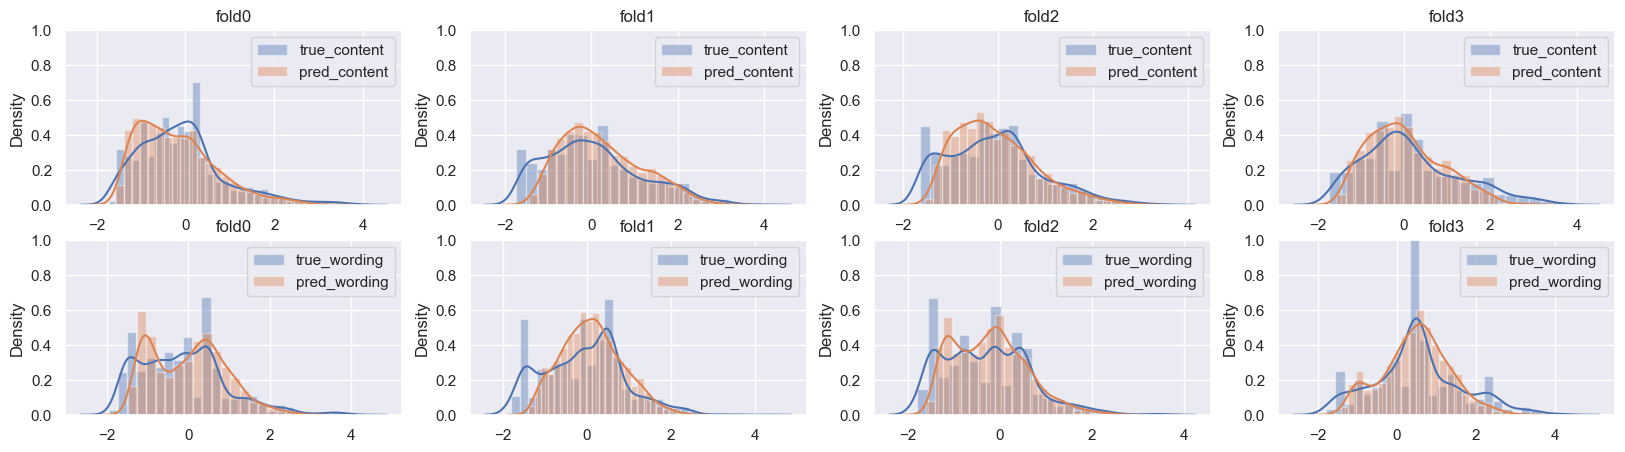

In [97]:
# fold単位での分布を確認する(base)
oof_df = pd.read_csv("../outputs/070/oof_df.csv")

fig, ax = plt.subplots(2, 4, figsize=(20, 5))

for fold in range(4):
    sns.distplot(
        x=oof_df[oof_df["fold"]==fold]["content"],
        ax=ax[0][fold],
        label="true_content"
    )
    sns.distplot(
        x=oof_df[oof_df["fold"]==fold]["pred_content"],
        ax=ax[0][fold],
        label="pred_content"
    )
    sns.distplot(
        x=oof_df[oof_df["fold"]==fold]["wording"],
        ax=ax[1][fold],
        label="true_wording"
    )
    sns.distplot(
        x=oof_df[oof_df["fold"]==fold]["pred_wording"],
        ax=ax[1][fold],
        label="pred_wording"
    )
    # 縦軸のスケール設定
    ax[0][fold].set_ylim(0, 1)
    ax[1][fold].set_ylim(0, 1)
    
    
    ax[0][fold].set_title(f"fold{fold}")
    ax[1][fold].set_title(f"fold{fold}")
    
    ax[0][fold].legend()
    ax[1][fold].legend()

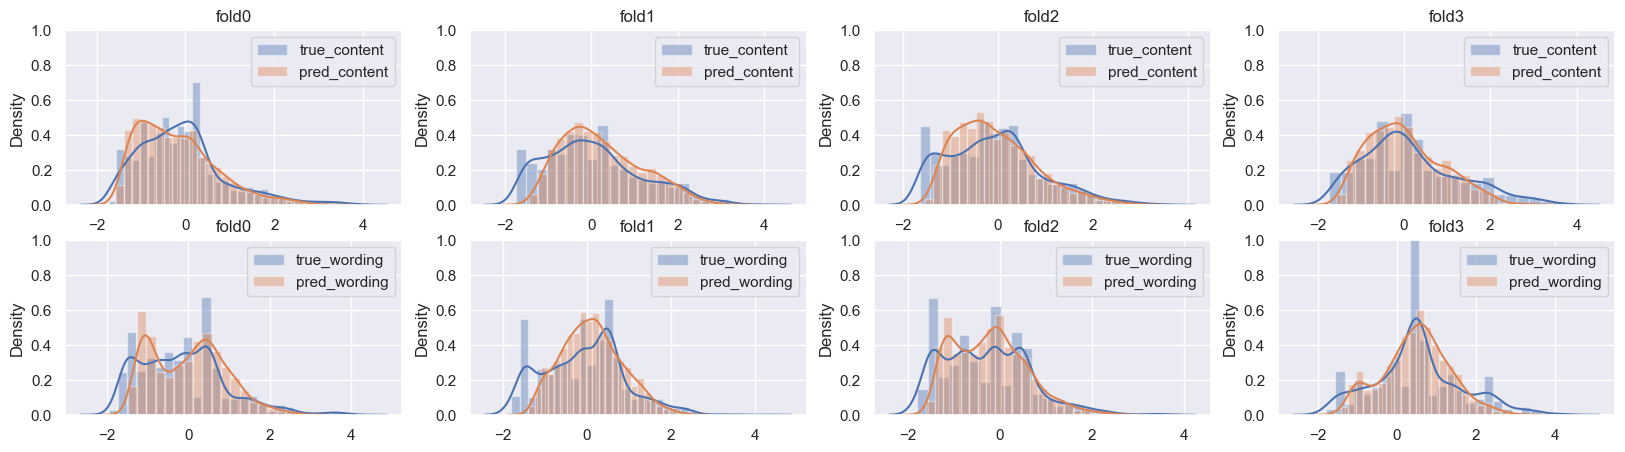

In [23]:
# fold単位での分布を確認する(large)
import warnings
warnings.filterwarnings("ignore")
oof_df = pd.read_csv("../outputs/070/oof_df.csv")

fig, ax = plt.subplots(2, 4, figsize=(20, 5))

for fold in range(4):
    sns.distplot(
        x=oof_df[oof_df["fold"]==fold]["content"],
        ax=ax[0][fold],
        label="true_content"
    )
    sns.distplot(
        x=oof_df[oof_df["fold"]==fold]["pred_content"],
        ax=ax[0][fold],
        label="pred_content"
    )
    sns.distplot(
        x=oof_df[oof_df["fold"]==fold]["wording"],
        ax=ax[1][fold],
        label="true_wording"
    )
    sns.distplot(
        x=oof_df[oof_df["fold"]==fold]["pred_wording"],
        ax=ax[1][fold],
        label="pred_wording"
    )
    # 縦軸のスケール設定
    ax[0][fold].set_ylim(0, 1)
    ax[1][fold].set_ylim(0, 1)
    
    
    ax[0][fold].set_title(f"fold{fold}")
    ax[1][fold].set_title(f"fold{fold}")
    
    ax[0][fold].legend()
    ax[1][fold].legend()

<Axes: xlabel='pred_wording', ylabel='wording'>

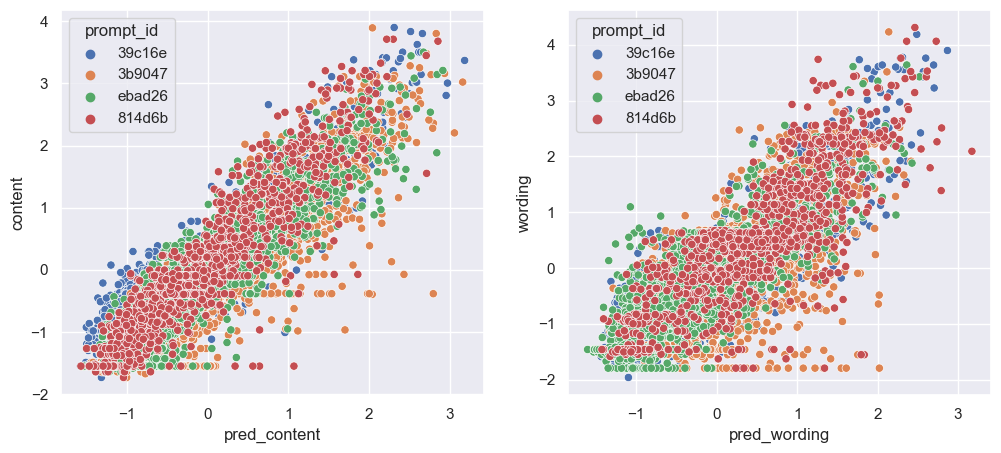

In [27]:
# 相関関係は？
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x="pred_content", y="content", data=oof_df, hue="prompt_id", ax=ax[0])
sns.scatterplot(x="pred_wording", y="wording", data=oof_df, hue="prompt_id", ax=ax[1])

In [ ]:
sns.scatterplot(x="pred_content", y="content", data=oof_df)

In [110]:
from sklearn.metrics import mean_squared_error

def MCRMSE(y_trues, y_preds):
    scores = []
    idxes = y_trues.shape[1]
    for i in range(idxes):
        y_true = y_trues[:, i]
        y_pred = y_preds[:, i]
        score = mean_squared_error(y_true, y_pred, squared=False)  # RMSE
        scores.append(score)
    mcrmse_score = np.mean(scores)
    return mcrmse_score, scores


def get_score(y_trues, y_preds):
    mcrmse_score, scores = MCRMSE(y_trues, y_preds)
    return mcrmse_score, scores

In [111]:
labels = oof_df[["content", "wording"]].values
preds = oof_df[[f"pred_{c}" for c in ["content", "wording"]]].values
score, scores = get_score(labels, preds)
print(f"Score: {score:<.4f}  Scores: {scores}")

Score: 0.5390  Scores: [0.4638799771953334, 0.6140829475268303]


In [155]:
# 後処理に意味があるのか？
# -1.xx以下と3以上は裾を広げるような処理がうまく機能しないか？
new_oof_df = oof_df.copy()
new_oof_df["pred_content"] = new_oof_df["pred_content"].apply(lambda x: x*1.2 if x < -1 and -1.5 > x else x)
#new_oof_df["pred_content"] = new_oof_df["pred_content"].apply(lambda x: x*1.3 if x > 2.75 and x < 3 else x)

new_oof_df["pred_wording"] = new_oof_df["pred_wording"].apply(lambda x: x*1.2 if x < -1 and -1.5 > x  else x)
#new_oof_df["pred_wording"] = new_oof_df["pred_wording"].apply(lambda x: x*1.3 if x > 2.75 and x < 3 else x)

In [156]:
labels = new_oof_df[["content", "wording"]].values
preds = new_oof_df[[f"pred_{c}" for c in ["content", "wording"]]].values
score, scores = get_score(labels, preds)
print(f"Score: {score:<.4f}  Scores: {scores}")

Score: 0.5391  Scores: [0.4640733583527942, 0.6141607277071769]


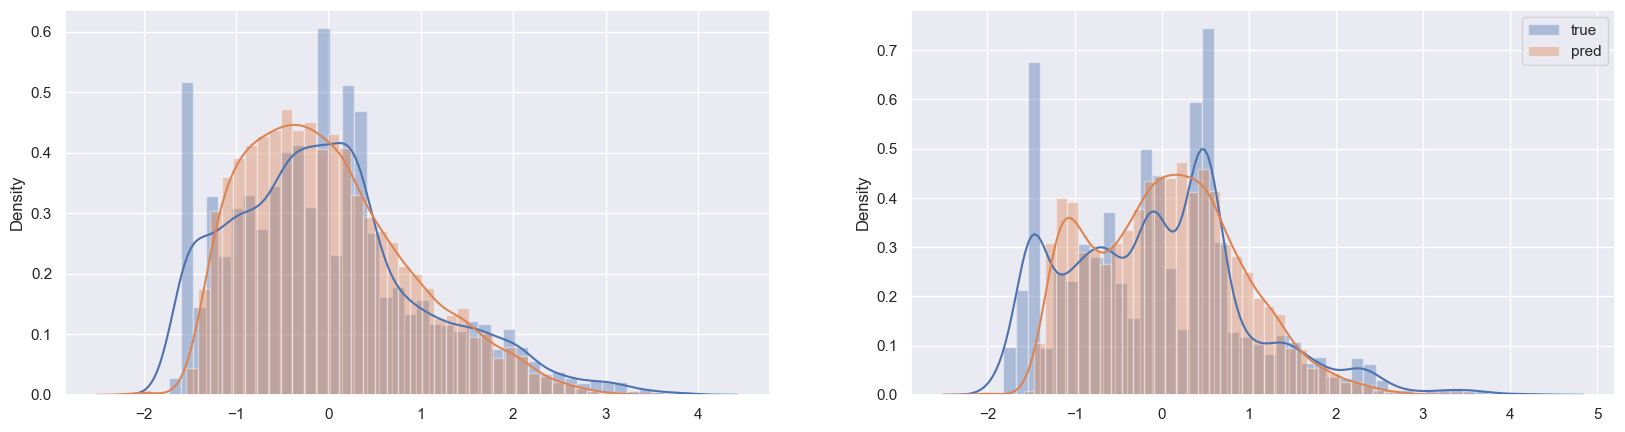

In [150]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.distplot(
    x=new_oof_df["content"],
    ax=ax[0],
    label="true"
)
sns.distplot(
    x=new_oof_df["pred_content"],
    ax=ax[0],
    label="pred"
)

sns.distplot(
    x=new_oof_df["wording"],
    ax=ax[1],
    label="true"
)
sns.distplot(
    x=new_oof_df["pred_wording"],
    ax=ax[1],
    label="pred"
)
plt.legend()
plt.show()

1.3333333333333333